# Evaluation

In [1]:
import pandas as pd 
from sklearn.metrics import accuracy_score
from seaborn import catplot
import pickle
from modules import utils

results = None
scores = []

In [2]:
for model_result in ['block4_pool', 'block5_pool', 'block2_pool']:
    print('Evaluating %s model...' % model_result)

    dataset_path = os.path.join(
        os.getcwd(),
        'data',
        model_result)

    x_train, y_train = utils.load_train_ds(dataset_path)
    x_test, y_test = utils.load_test_ds(dataset_path)
    x_train = utils.custom_flatten(x_train)
    x_test = utils.custom_flatten(x_test)

    with open(os.path.join(os.getcwd(), 'results', f'results_{model_result}'), 'rb') as f:
        results = pickle.load(f)
    block_model = results.best_estimator_

    # Evaluation on train-set
    y_train_pred = block_model.predict(x_train)
    tr_accuracy = accuracy_score(y_train, y_train_pred)
    print("%s - train accuracy:   %.2f%%" % (model_result, (tr_accuracy * 100.0)))
    scores.append([model_result, 'train', tr_accuracy])

    # Evaluation on validation-set
    # It's the mean of the accuracy for the 5 cv-fold on the best model founded by random search
    va_accuracy = results.best_score_ 
    print("%s - val accuracy:     %.2f%%" % (model_result, (results.best_score_ * 100.0)))
    scores.append([model_result, 'val', va_accuracy])

    # Evaluation on train-set
    y_test_pred = block_model.predict(x_test)
    te_accuracy = accuracy_score(y_test, y_test_pred)
    print("%s - test accuracy:    %.2f%%\n" % (model_result, (te_accuracy * 100.0)))
    scores.append([model_result, 'test', te_accuracy])

Evaluating block4_pool model...
block4_pool - train accuracy:   100.00%
block4_pool - val accuracy:     96.41%
block4_pool - test accuracy:    94.61%

Evaluating block5_pool model...
block5_pool - train accuracy:   100.00%
block5_pool - val accuracy:     95.60%
block5_pool - test accuracy:    93.53%

Evaluating block2_pool model...
block2_pool - train accuracy:   99.73%
block2_pool - val accuracy:     94.28%
block2_pool - test accuracy:    90.84%



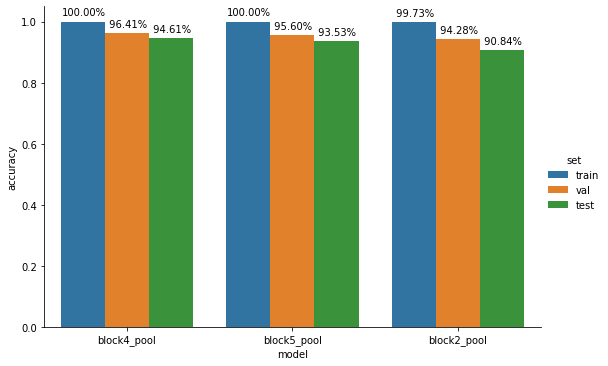

In [5]:
df_scores = pd.DataFrame(scores, columns = ['model', 'set', 'accuracy'])
plot = catplot(x='model', y='accuracy', hue='set', kind='bar', data=df_scores, aspect=1.5)

def text_displayed(value):
    out = '%.2f%%' % (value*100)
    out = ' ' + out if len(out) == 6 else out 
    return out

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.005, 
            p.get_height() * 1.02, 
            text_displayed(p.get_height()), 
            color='black', rotation='horizontal', size='medium')